In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer


In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
print("\nMissing or Zero Values:")
print((df == 0).sum())


Missing or Zero Values:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [7]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)


In [8]:
imputer = SimpleImputer(strategy='median')
df[cols_with_zero] = imputer.fit_transform(df[cols_with_zero])


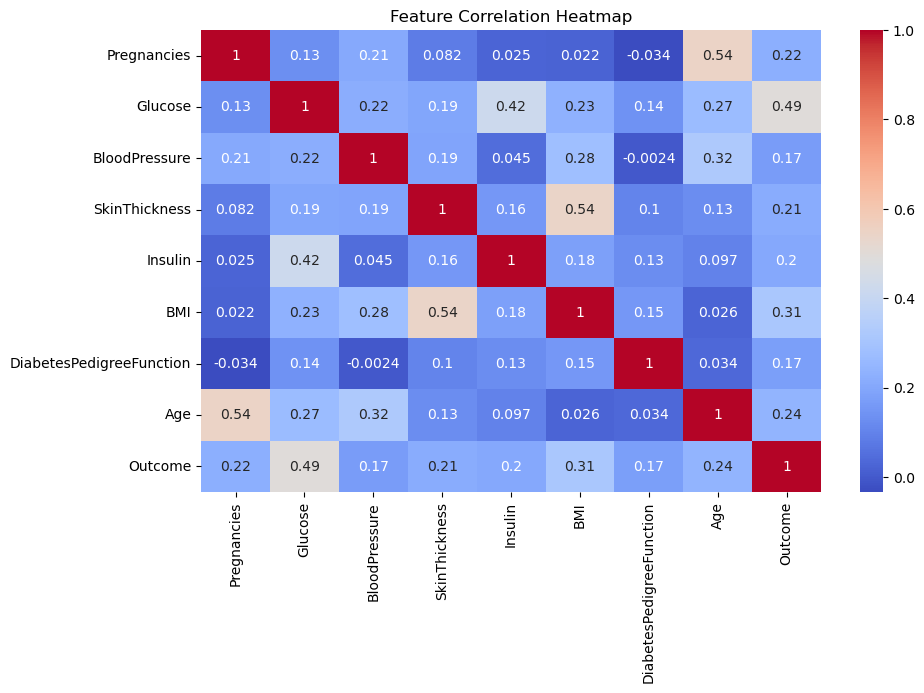

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [16]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))



Confusion Matrix:
[[78 21]
 [19 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

Accuracy Score: 0.7402597402597403


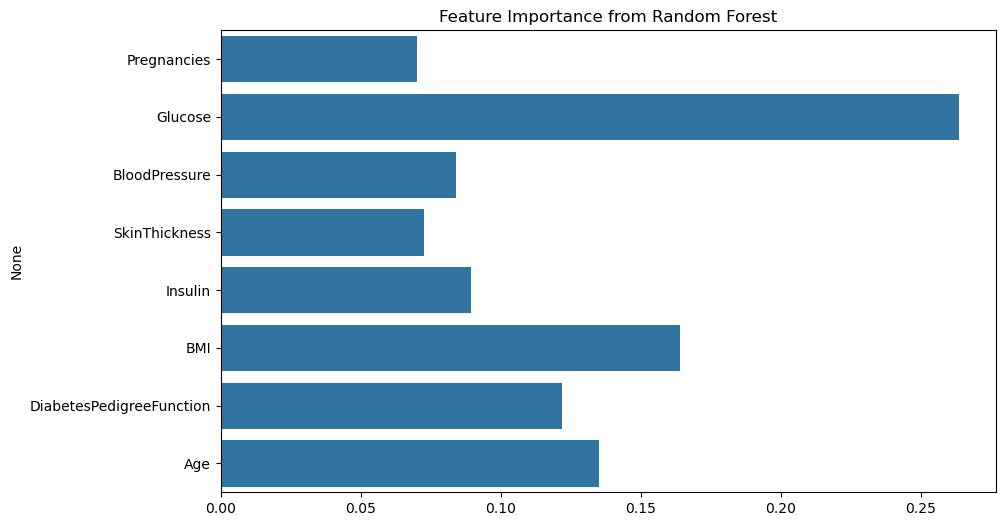

In [17]:
feature_importance = model.feature_importances_
features = df.columns[:-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance from Random Forest")
plt.show()

In [20]:
import joblib
joblib.dump(model, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [22]:
import streamlit as st
import numpy as np
import joblib

# Load model and scaler
model = joblib.load('diabetes_model.pkl')
scaler = joblib.load('scaler.pkl')

st.title("🩺 Type 2 Diabetes Prediction App")

# User inputs
pregnancies = st.number_input("Pregnancies", min_value=0, max_value=20, value=1)
glucose = st.number_input("Glucose", min_value=0, max_value=200, value=120)
blood_pressure = st.number_input("Blood Pressure", min_value=0, max_value=140, value=70)
skin_thickness = st.number_input("Skin Thickness", min_value=0, max_value=100, value=20)
insulin = st.number_input("Insulin", min_value=0, max_value=900, value=80)
bmi = st.number_input("BMI", min_value=0.0, max_value=70.0, value=25.0)
dpf = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=3.0, value=0.5)
age = st.number_input("Age", min_value=1, max_value=120, value=33)

if st.button("Predict"):
    input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness,
                             insulin, bmi, dpf, age]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    if prediction == 1:
        st.error(f"⚠️ High Risk of Type 2 Diabetes ({probability*100:.2f}%)")
    else:
        st.success(f"✅ Low Risk of Type 2 Diabetes ({(1 - probability)*100:.2f}%)")



2025-08-09 23:36:08.126 
  command:

    streamlit run C:\Users\loris\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-09 23:36:08.127 Session state does not function when running a script without `streamlit run`


['scaler.pkl']